In [1]:
import pandas as pd
df=pd.read_csv('../../dataset/training_data.csv') 

c:\users\aditya\venv\data-science\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (6,54) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df.head(5)

,PolicyNo,Policy_Company,Policy_Installment_Term,Policy_Billing_Code,Policy_Method_Of_Payment,Policy_Reinstatement_Fee_Indicator,Policy_Zip_Code_Garaging_Location,Vehicle_Territory,Vehicle_Make_Year,Vehicle_Make_Description,...,EEA_Prior_Bodily_Injury_Limit,EEA_PolicyYear,SYS_Renewed,SYS_New_Business,Annual_Premium,Claim_Count,Loss_Amount,Frequency,Severity,Loss_Ratio
0,164532941,Standard,6,Direct Billed to Insured,Pre-paid,N,43046,35,2004,BUIK LESABRE LI,...,100-400,2006,Y,N,320.12,0,0.0,0.0,0.0,0.0
1,164533241,Standard,6,Direct Billed to Insured,Pre-paid,N,Unknown,35,1980,CADILLAC 4-DOOR,...,100-200,2006,Y,N,259.70,0,0.0,0.0,0.0,0.0
2,164534633,Standard,6,Direct Billed to Insured,Pre-paid,N,43555,17,2005,PONT MONTANA SV,...,100-400,2006,Y,N,613.74,0,0.0,0.0,0.0,0.0
3,164534839,Standard,6,Direct Billed to Insured,Pre-paid,N,43561,17,2005,MERC GRAND MARQ,...,40-100,2006,Y,N,541.66,0,0.0,0.0,0.0,0.0
4,164534840,Standard,6,Direct Billed to Insured,Pre-paid,N,43561,17,2005,MERC GRAND MARQ,...,40-100,2006,Y,N,541.66,0,0.0,0.0,0.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424431 entries, 0 to 424430
Data columns (total 69 columns):
PolicyNo                                    424431 non-null int64
Policy_Company                              424431 non-null object
Policy_Installment_Term                     424431 non-null int64
Policy_Billing_Code                         424431 non-null object
Policy_Method_Of_Payment                    424431 non-null object
Policy_Reinstatement_Fee_Indicator          424431 non-null object
Policy_Zip_Code_Garaging_Location           424431 non-null object
Vehicle_Territory                           424431 non-null int64
Vehicle_Make_Year                           424431 non-null int64
Vehicle_Make_Description                    424431 non-null object
Vehicle_Performance                         424431 non-null object
Vehicle_New_Cost_Amount                     424431 non-null int64
Vehicle_Symbol                              424431 non-null int64
Vehicle_Number_Of_Driver

In [4]:
print(df['Loss_Amount'].describe())

count    4.244310e+05
mean     2.354292e+02
std      3.399225e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.072292e+06
Name: Loss_Amount, dtype: float64


In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

list(set(df.dtypes.tolist()))


[dtype('O'), dtype('int64'), dtype('float64')]

In [6]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,PolicyNo,Policy_Installment_Term,Vehicle_Territory,Vehicle_Make_Year,Vehicle_New_Cost_Amount,Vehicle_Symbol,Vehicle_Number_Of_Drivers_Assigned,Vehicle_Miles_To_Work,Vehicle_Days_Per_Week_Driven,Vehicle_Age_In_Years,...,Driver_Total_Upper_Senior_Ages_70_plus,Vehicle_Driver_Points,EEA_Policy_Tenure,EEA_PolicyYear,Annual_Premium,Claim_Count,Loss_Amount,Frequency,Severity,Loss_Ratio
0,164532941,6,35,2004,-1,11,1,-1,5,3,...,1,0,22.7,2006,320.12,0,0.0,0.0,0.0,0.0
1,164533241,6,35,1980,-1,11,1,-1,5,9,...,1,0,47.1,2006,259.70,0,0.0,0.0,0.0,0.0
2,164534633,6,17,2005,-1,10,1,-1,5,2,...,1,0,47.2,2006,613.74,0,0.0,0.0,0.0,0.0
3,164534839,6,17,2005,-1,12,1,-1,5,2,...,1,0,46.7,2006,541.66,0,0.0,0.0,0.0,0.0
4,164534840,6,17,2005,-1,12,1,-1,5,2,...,1,0,47.2,2006,541.66,0,0.0,0.0,0.0,0.0


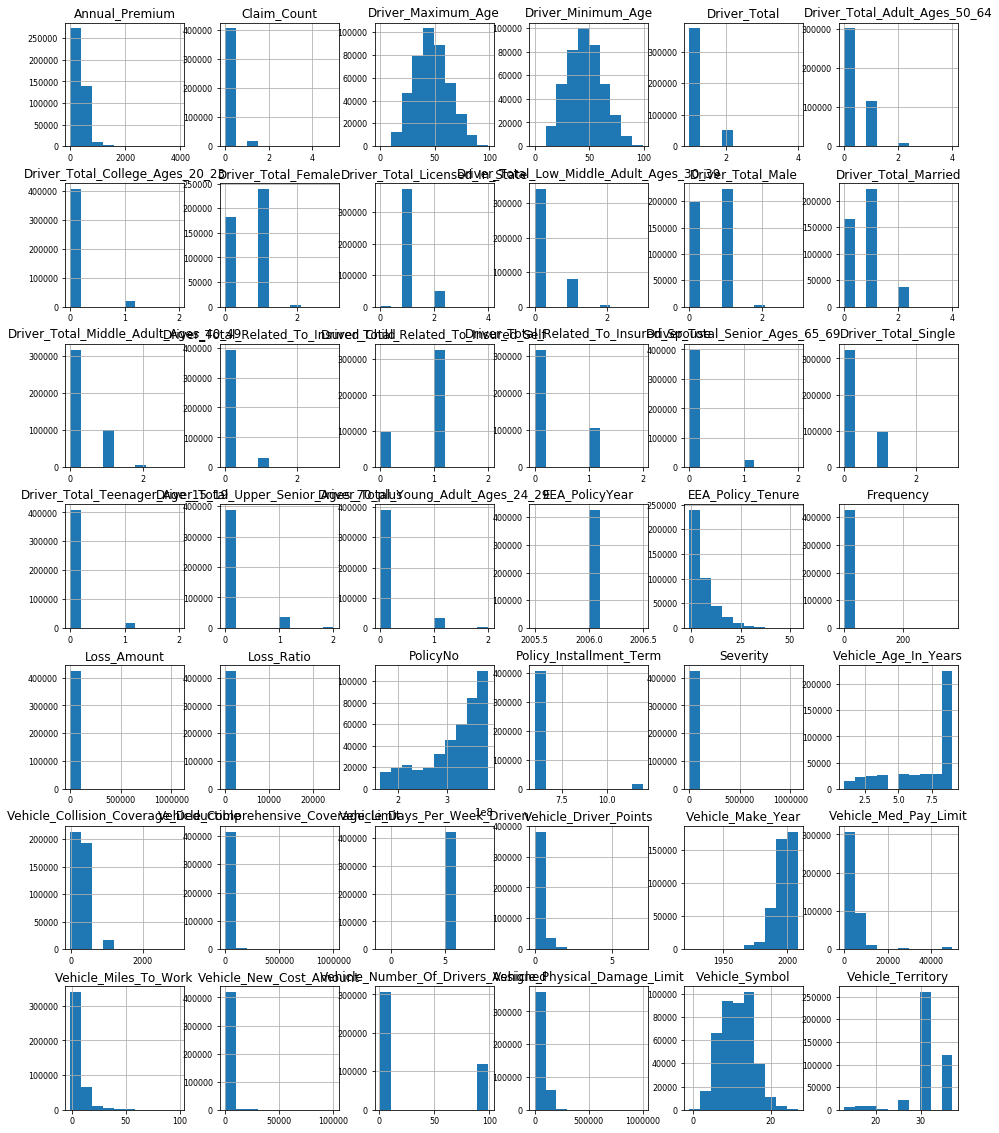

In [7]:
df_num.hist(figsize=(16, 20), bins=10, xlabelsize=8, ylabelsize=8);

In [8]:
df_num_corr = df_num.corr()['Loss_Ratio'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with Loss Ratio:\n{}".format(len(golden_features_list), golden_features_list))

There is 2 strongly correlated values with Loss Ratio:
Severity       0.585348
Loss_Amount    0.578532
Name: Loss_Ratio, dtype: float64


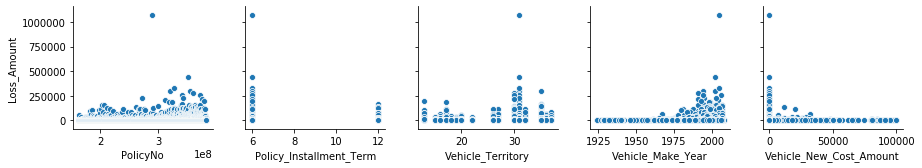

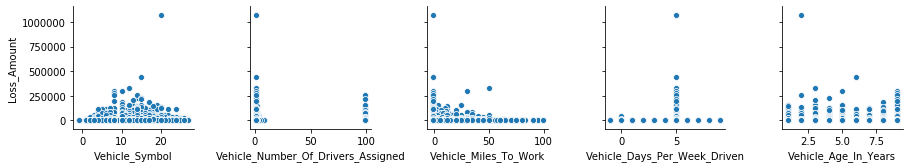

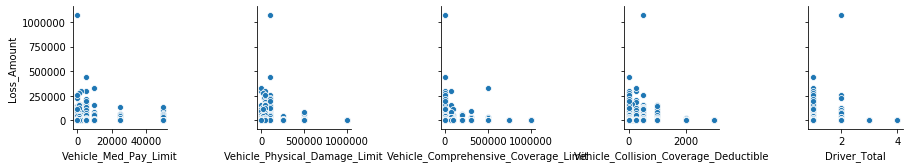

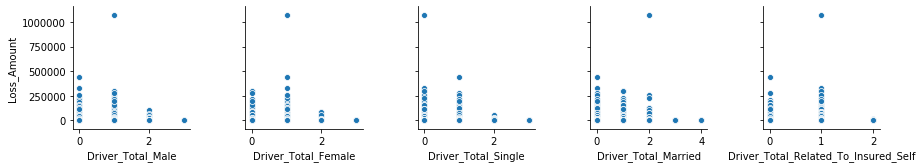

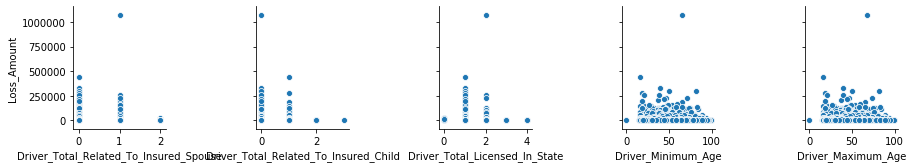

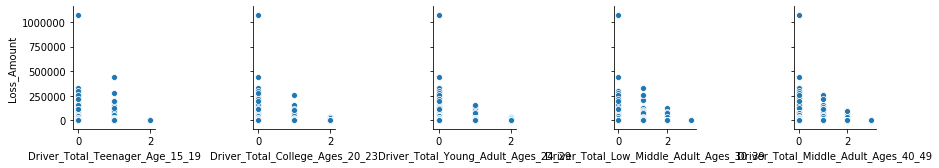

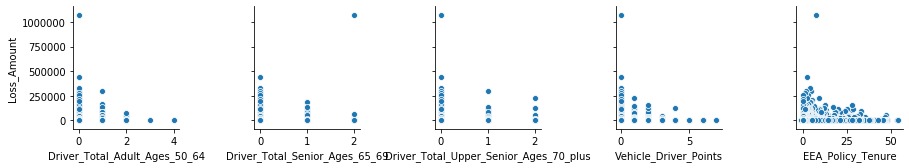

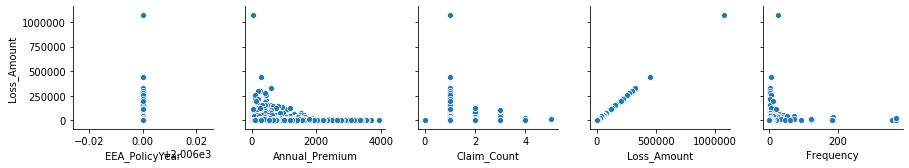

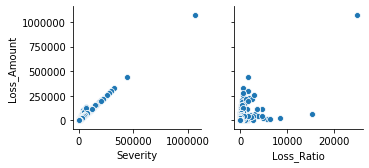

In [16]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['Loss_Amount'])

In [22]:
import operator

individual_features_df = []
for i in range(0, len(df_num.columns) - 1): # -1 because the last column is SalePrice
    tmpDf = df_num[[df_num.columns[i], 'Loss_Ratio']]
    tmpDf = tmpDf[tmpDf[df_num.columns[i]] != 0]
    individual_features_df.append(tmpDf)

all_correlations = {feature.columns[0]: feature.corr()['Loss_Ratio'][0] for feature in individual_features_df}
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))
for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key, value))

 Annual_Premium: -0.013339920079685551
Driver_Total_Young_Adult_Ages_24_29: -0.007484243417789896
    Claim_Count: -0.006178553745877163
Vehicle_Territory: -0.0033056865821038833
Driver_Total_College_Ages_20_23: -0.0029397817474795273
Driver_Total_Teenager_Age_15_19: -0.00260846561524449
Vehicle_Number_Of_Drivers_Assigned: -0.002467253158314009
Driver_Total_Related_To_Insured_Child: -0.002214782841786722
EEA_Policy_Tenure: -0.0020643106155954966
Vehicle_Age_In_Years: -0.0019980706166668467
Driver_Total_Low_Middle_Adult_Ages_30_39: -0.0016933821806841335
Driver_Minimum_Age: -0.001432014354074631
Vehicle_Miles_To_Work: -0.0010839766441333026
Driver_Total_Single: -0.001050578740374892
Vehicle_Comprehensive_Coverage_Limit: -0.0009278728159171606
Vehicle_Collision_Coverage_Deductible: -0.0008157454015723943
Driver_Maximum_Age: -0.0008040549385962709
Vehicle_Med_Pay_Limit: -0.0006227805741488844
Vehicle_New_Cost_Amount: -0.0004950291756061317
Driver_Total_Related_To_Insured_Spouse: -0.000383

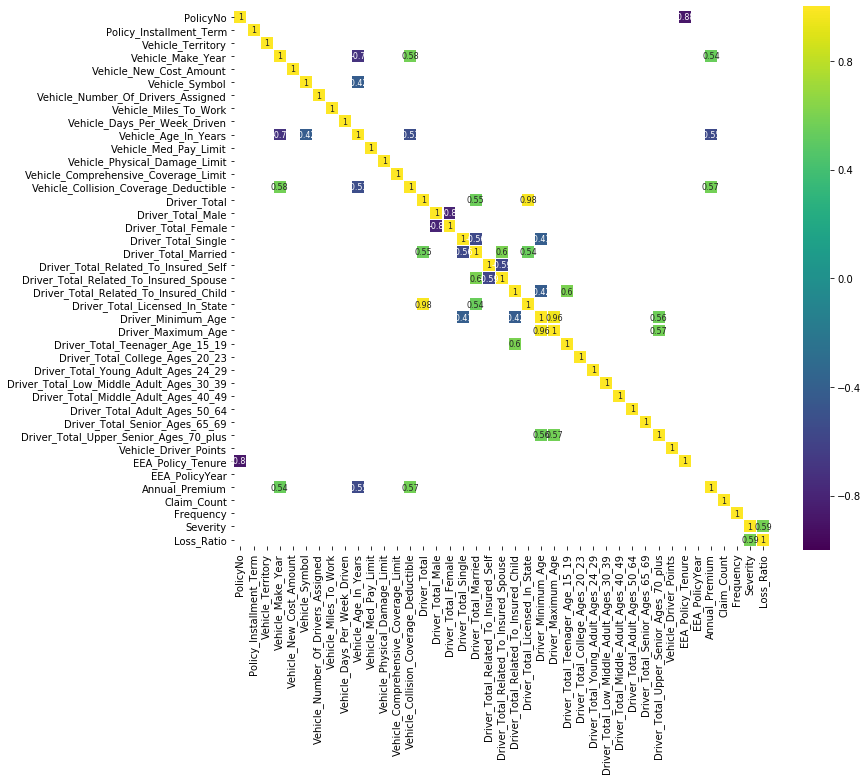

In [24]:
corr = df_num.drop('Loss_Amount', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [26]:
quantitative_features_list = ['Vehicle_Territory',
'Vehicle_Make_Year',
'Vehicle_Symbol',
'Vehicle_Number_Of_Drivers_Assigned',
'Vehicle_Age_In_Years',
'Driver_Total_Male',
'Driver_Total_Female',
'Driver_Total_Single',
'Driver_Total_Married',
'Driver_Minimum_Age',
'Driver_Maximum_Age',
'Vehicle_Youthful_Driver_Indicator',
'Annual_Premium']
df_quantitative_values = df[quantitative_features_list]
df_quantitative_values.head()

,Vehicle_Territory,Vehicle_Make_Year,Vehicle_Symbol,Vehicle_Number_Of_Drivers_Assigned,Vehicle_Age_In_Years,Driver_Total_Male,Driver_Total_Female,Driver_Total_Single,Driver_Total_Married,Driver_Minimum_Age,Driver_Maximum_Age,Vehicle_Youthful_Driver_Indicator,Annual_Premium
0,35,2004,11,1,3,0,1,0,0,75,75,N,320.12
1,35,1980,11,1,9,0,1,0,1,71,71,N,259.70
2,17,2005,10,1,2,1,0,0,1,80,80,N,613.74
3,17,2005,12,1,2,1,0,0,1,74,74,N,541.66
4,17,2005,12,1,2,1,0,0,1,75,75,N,541.66


In [28]:
features_to_analyse = [x for x in quantitative_features_list if x in golden_features_list]
features_to_analyse.append('Loss_Amount')
features_to_analyse

['Loss_Amount']

In [35]:
categorical_features = [a for a in quantitative_features_list[:-1] + df.columns.tolist() if (a not in quantitative_features_list[:-1]) or (a not in df.columns.tolist())]
df_categ = df[categorical_features]
df_categ.head()
df_not_num = df_categ.select_dtypes(include = ['O'])
print('There is {} non numerical features including:\n{}'.format(len(df_not_num.columns), df_not_num.columns.tolist()))

There is 26 non numerical features including:
['Policy_Company', 'Policy_Billing_Code', 'Policy_Method_Of_Payment', 'Policy_Reinstatement_Fee_Indicator', 'Policy_Zip_Code_Garaging_Location', 'Vehicle_Make_Description', 'Vehicle_Performance', 'Vehicle_Usage', 'Vehicle_Annual_Miles', 'Vehicle_Anti_Theft_Device', 'Vehicle_Passive_Restraint', 'Vehicle_Bodily_Injury_Limit', 'Vehicle_Comprehensive_Coverage_Indicator', 'Vehicle_Collision_Coverage_Indicator', 'Vehicle_Youthful_Driver_Training_Code', 'Vehicle_Youthful_Good_Student_Code', 'Vehicle_Safe_Driver_Discount_Indicator', 'EEA_Liability_Coverage_Only_Indicator', 'EEA_Multi_Auto_Policies_Indicator', 'EEA_Policy_Zip_Code_3', 'EEA_Agency_Type', 'EEA_Packaged_Policy_Indicator', 'EEA_Full_Coverage_Indicator', 'EEA_Prior_Bodily_Injury_Limit', 'SYS_Renewed', 'SYS_New_Business']


In [36]:
df_not_num = df_categ.select_dtypes(include = ['O'])
print('There is {} non numerical features including:\n{}'.format(len(df_not_num.columns), df_not_num.columns.tolist()))

There is 26 non numerical features including:
['Policy_Company', 'Policy_Billing_Code', 'Policy_Method_Of_Payment', 'Policy_Reinstatement_Fee_Indicator', 'Policy_Zip_Code_Garaging_Location', 'Vehicle_Make_Description', 'Vehicle_Performance', 'Vehicle_Usage', 'Vehicle_Annual_Miles', 'Vehicle_Anti_Theft_Device', 'Vehicle_Passive_Restraint', 'Vehicle_Bodily_Injury_Limit', 'Vehicle_Comprehensive_Coverage_Indicator', 'Vehicle_Collision_Coverage_Indicator', 'Vehicle_Youthful_Driver_Training_Code', 'Vehicle_Youthful_Good_Student_Code', 'Vehicle_Safe_Driver_Discount_Indicator', 'EEA_Liability_Coverage_Only_Indicator', 'EEA_Multi_Auto_Policies_Indicator', 'EEA_Policy_Zip_Code_3', 'EEA_Agency_Type', 'EEA_Packaged_Policy_Indicator', 'EEA_Full_Coverage_Indicator', 'EEA_Prior_Bodily_Injury_Limit', 'SYS_Renewed', 'SYS_New_Business']


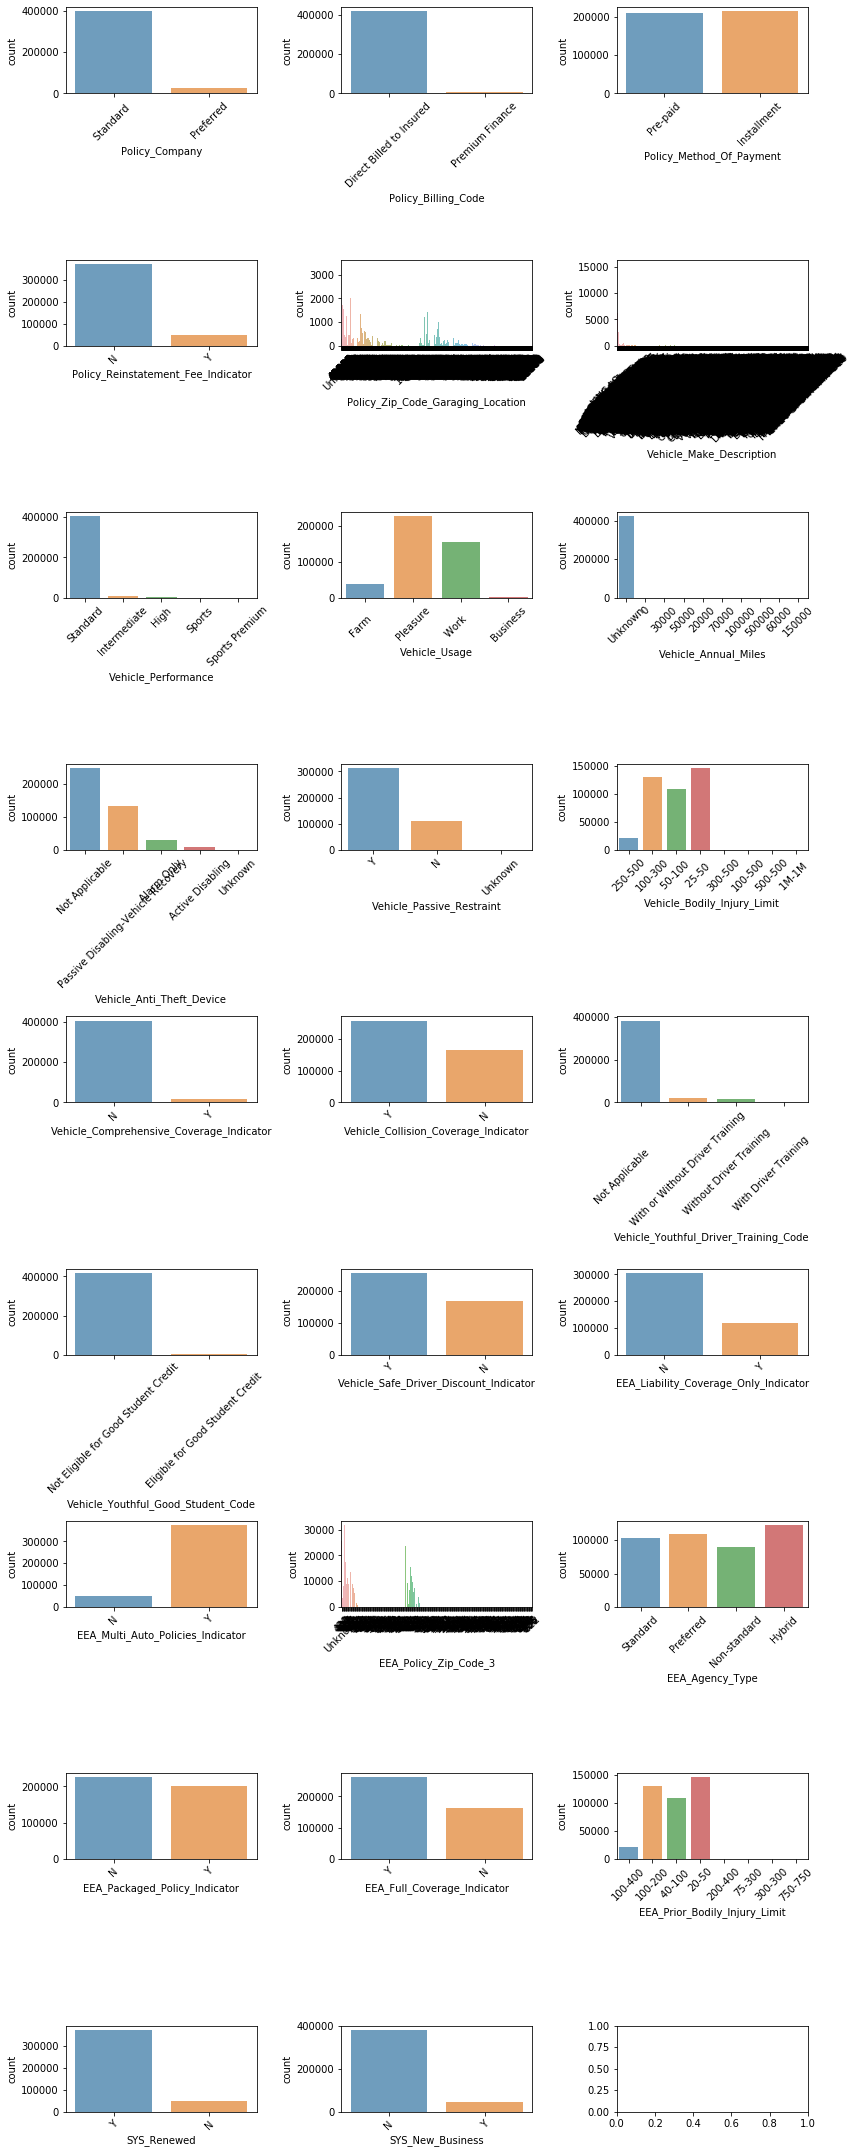

In [39]:
fig, axes = plt.subplots(round(len(df_not_num.columns) / 3), 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    if i < len(df_not_num.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=df_not_num.columns[i], alpha=0.7, data=df_not_num, ax=ax)

fig.tight_layout()